<a href="https://colab.research.google.com/github/qasim-mansoor/pyTorch/blob/main/PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## Computer vision libraries in PyTorch
* `torchvision` - base domain library for computer vision in PyTorch
* `torchvision.datasets` - For datasets and data loading functions
* `torchvision.models` - For pretrained computer vision models
* `torchvision.transforms` - Functions for manipulating vision data
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create a Python iterable over a dataset

In [7]:
# Importing libraries

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## Getting a Dataset

Dataset used is FashionMNIST from torchvision - A dataset with grayscale images of clothing items

In [8]:
# Setup data

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15643015.83it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 263029.04it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4894225.14it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18614031.89it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [9]:
len(train_data), len(test_data)

(60000, 10000)

In [10]:
# See the first training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [11]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [13]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [14]:
# Checking the shape
image.shape, label

(torch.Size([1, 28, 28]), 9)

## Visualizing the data

In [15]:
print(f"Image Shape: {image.shape}")

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

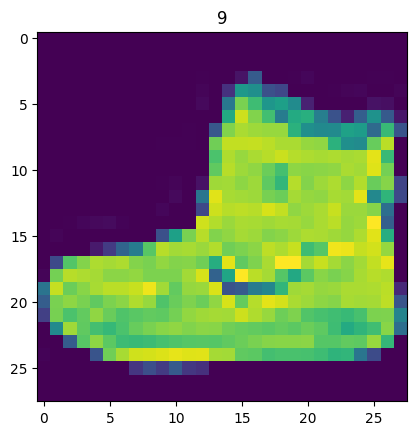

In [16]:
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

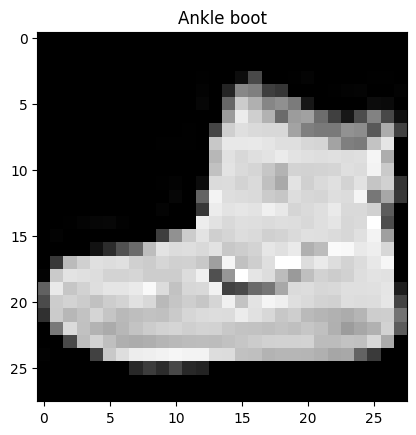

In [17]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

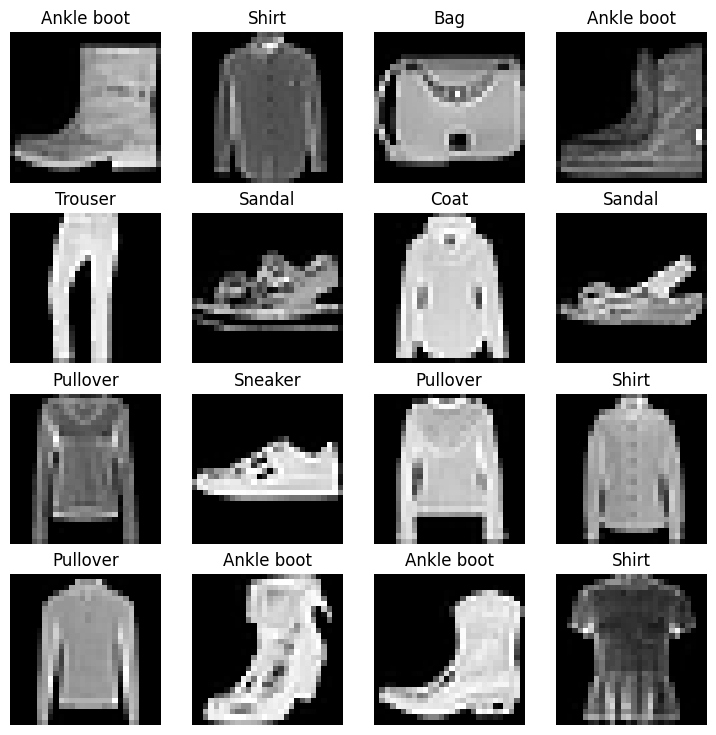

In [18]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## Preparing a DataLoader

We need to convert these images from a DataSet into a python iterable. We do this using DataLoaders

More specifically, we want to turn our data into batches. (Commonly 32 items per batch)

Why?
1. It is more computationally efficient. (For larger datasets)  
2. It gives the neural network more changes to update its gradients per epoch. (i.e. instead of updating gradients every 60,000 images, it updates after every 32)

In [19]:
from torch.utils.data import DataLoader

# Setup batchsize

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c56ec25c670>,
 <torch.utils.data.dataloader.DataLoader at 0x7c56ebc92fe0>)

In [20]:
# See what is created

print(f"Batches of Training Data: {len(train_dataloader)}")
print(f"Batches of Testing Data: {len(test_dataloader)}")

Batches of Training Data: 1875
Batches of Testing Data: 313


In [21]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Bag')

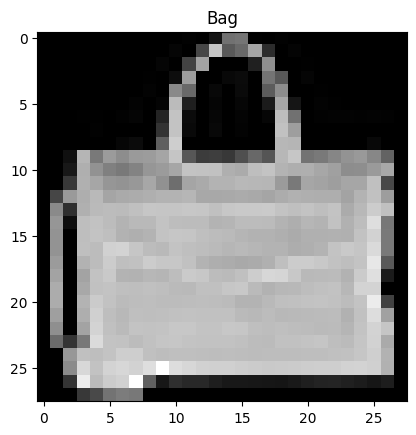

In [22]:
# Viewing samples in batches

# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

## Building a model

Start with a baseline -> increase complexity through experimentation and evaluation

In [23]:
# A flattening layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
# x.shape

# Flatten the sample
output = flatten_model(x)

# Viewing the output
print(f"Shape before flattening: {x.shape} -> [color_channel, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channel, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channel, height*width]


In [24]:
# Creating model class

class FashionMNISTModelV0(nn.Module):
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [25]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

In [26]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## Setting up a loss function and optimizer

* Loss Function will be CrossEntropyLoss - Because of multiclass
* Optimizer will be SGD
* Evaluation metric will be accuracy

In [27]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [28]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## Creating a function to time experiments

Things to track when Machine learning:
1. Model's performance(loss, accuracy, etc.)
2. Time taken to train the model

In [29]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## Setting up the training loop on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate training loss
3. Loop through testing batches, perform testing steps, calculate testing loss
4. Time the process

In [30]:
# Using tqdm for a progress bar

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Using less epochs to test and debug the model first
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n~~~~~~")

  # Training
  train_loss = 0

  # Loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    y_preds = model_0(X)

    loss = loss_fn(y_preds, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
~~~~~~
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.5904 | Test Loss: 0.5095 | Test Acc: 82.0387
Epoch: 1
~~~~~~
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.4763 | Test Loss: 0.4799 | Test Acc: 83.1969
Epoch: 2
~~~~~~
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.4550 | Test Loss: 0.4766 | Test Acc: 83.4265
Train time on cpu: 28.770 seconds


## Make predictions and get Model 0 results

In [31]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [32]:
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [33]:
## Setting up device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [34]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [35]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [36]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [37]:
# Building a function for training

def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device):
  """ Performs a training loop step with a model learning on a dataloader """
  model.train()

  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")


In [38]:
def test_step(model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device):
  """ Performs a testing loop step with a model learning on a dataloader """
  test_loss, test_acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

In [39]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n~~~~~~~~~~")
  train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)

  test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
~~~~~~~~~~
Train Loss: 1.09199 | Train Acc: 61.34%
Test Loss: 0.95636 | Test Acc: 65.00%
Epoch: 1 
~~~~~~~~~~
Train Loss: 0.78101 | Train Acc: 71.93%
Test Loss: 0.72227 | Test Acc: 73.91%
Epoch: 2 
~~~~~~~~~~
Train Loss: 0.67027 | Train Acc: 75.94%
Test Loss: 0.68500 | Test Acc: 75.02%
Train time on cuda: 33.398 seconds


In [40]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a dictionary containing the results of model predicting on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [41]:
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_0_results, model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850008964538574,
  'model_acc': 75.01996805111821})

# Building a Convolutional Neural Network in PyTorch(CNN)

Typically, to find patterns in image data, CNNs are used

In [67]:
class FashionMNISTModelV2(nn.Module):
  """ Model architecture that replicates the TinyVGG model"""
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x
    # return self.classfier(self.conv_block_2(self.conv_block_1(x)))

In [68]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### Seeing the effect of a `nn.Conv2d()` layer.

In [69]:
torch.manual_seed(42)

# Creating dummy data
images = torch.randn(size=(32, 3, 64, 64)) # -> [batchsize, colour_channels, height, width]
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single images shape: {test_image.shape}")
print(f"Test image: \n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single images shape: torch.Size([3, 64, 64])
Test image: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [70]:
# Creating a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=1
)

# Passing data through the conv layer
conv_output = conv_layer(test_image.unsqueeze(0))

In [71]:
conv_output

tensor([[[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
          [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
          [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
          ...,
          [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
          [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
          [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

         [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
          [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
          [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
          ...,
          [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
          [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
          [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

         [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
          [-0.5791,  0.4414,  

In [72]:
conv_output.shape

torch.Size([1, 10, 64, 64])

## Seeing the effect of the `nn.MaxPool2d()` layer

In [73]:
import torch
from torch import nn

In [74]:
torch.manual_seed(42)

# Creating dummy data
images = torch.randn(size=(32, 3, 64, 64)) # -> [batchsize, colour_channels, height, width]
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single images shape: {test_image.shape}")
print(f"Test image: \n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single images shape: torch.Size([3, 64, 64])
Test image: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [75]:
print(f"Dimensions with the test_image unsqueezed: {test_image.unsqueeze(0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Image through conv first
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after convolution: {test_image_through_conv.shape}")

# Image through max pool after
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after convolution and max pool: {test_image_through_conv_and_maxpool.shape}")

Dimensions with the test_image unsqueezed: torch.Size([1, 3, 64, 64])
Shape after convolution: torch.Size([1, 10, 64, 64])
Shape after convolution and max pool: torch.Size([1, 10, 32, 32])


## Seeing the output on a smaller matrix

In [76]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nOriginal Tensor:\n{random_tensor}")
print(f"\nOriginal Tensor Shape:\n{random_tensor.shape}")
print(f"\nMax pool tensor: \n{max_pool_tensor}")
print(f"\nMax pool tensor shape: \n{max_pool_tensor.shape}")


Original Tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Original Tensor Shape:
torch.Size([1, 1, 2, 2])

Max pool tensor: 
tensor([[[[0.3367]]]])

Max pool tensor shape: 
torch.Size([1, 1, 1, 1])


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0784, 0.4431, 0.4588,
          0.0039, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0196, 0.0000, 0.2784, 0.7725, 0.3529, 0.4118,
          0.6471, 0.1765, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0196, 0.0000, 0.2627, 0.6392, 0.0000, 0.0000, 0.0000,
          0.1294, 0.5608, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0000, 0.0510, 0.6157, 0.0000, 0.0000, 0.0314, 0.0431,
          0.0000, 0.4549, 0.3451, 0.0000, 0.0196, 0.0000,

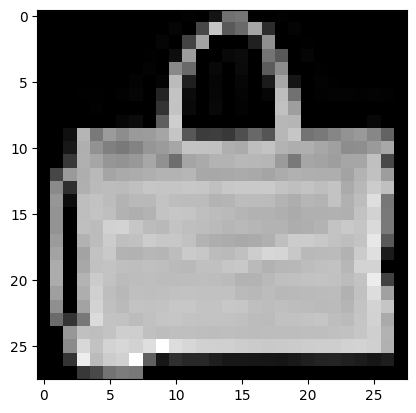

In [77]:
plt.imshow(image.squeeze(), cmap='gray')
image

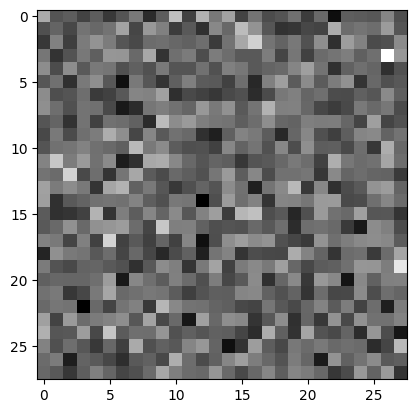

In [78]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor

plt.imshow(rand_image_tensor.squeeze(), cmap='gray')

In [79]:
# Pass the above image through the Tiny Vgg model

model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Training the CNN with actual data

In [80]:
# Setting up loss function, eval metrics and optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)


In [81]:
# Setting up training/testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 0.59102 | Train Acc: 78.53%
Test Loss: 0.39229 | Test Acc: 85.93%
Epoch: 1
Train Loss: 0.36578 | Train Acc: 86.76%
Test Loss: 0.35861 | Test Acc: 86.75%
Epoch: 2
Train Loss: 0.32863 | Train Acc: 88.10%
Test Loss: 0.33743 | Test Acc: 87.37%
Train time on cuda: 38.087 seconds


In [83]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [84]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3374316394329071,
 'model_acc': 87.37020766773163}

# Comparing results and trainig times of all models

In [85]:
import pandas as pd

compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.337432,87.370208


In [87]:
# Adding training times to these results

compare_results["Training Time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,Training Time
0,FashionMNISTModelV0,0.476639,83.426518,28.769866
1,FashionMNISTModelV1,0.685001,75.019968,33.397628
2,FashionMNISTModelV2,0.337432,87.370208,38.087246


Text(0, 0.5, 'model')

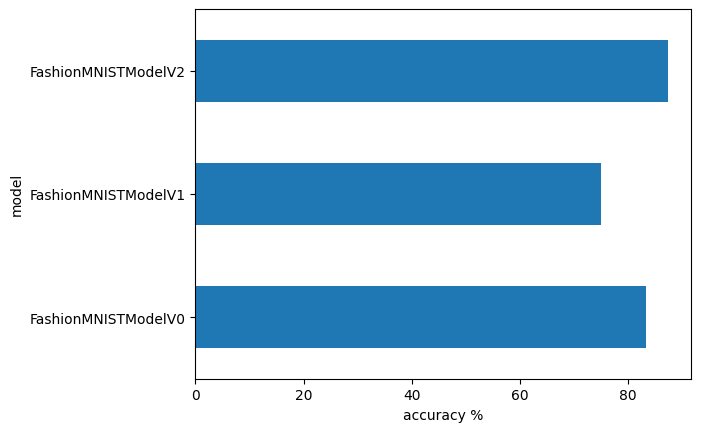

In [88]:
# Visualizing the results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model")

In [89]:
# Making prediction on random samples from the test dataset using model 2

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [117]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

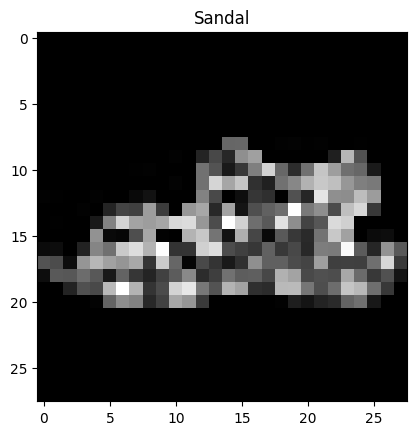

In [118]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [119]:
# Making predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[9.5472e-07, 1.4124e-06, 2.4489e-06, 2.0686e-06, 1.9043e-06, 9.9953e-01,
         7.4659e-07, 2.7168e-04, 3.7066e-05, 1.5038e-04],
        [1.8548e-03, 5.2161e-06, 9.3410e-02, 1.4149e-04, 3.7299e-02, 9.2045e-07,
         8.6717e-01, 5.1901e-07, 1.1573e-04, 4.2386e-06]])

In [120]:
# Convert probabilites to labels

pred_classes = pred_probs.argmax(dim=1)

In [121]:
test_labels, pred_classes

([5, 6, 6, 4, 3, 1, 4, 6, 6], tensor([5, 6, 6, 6, 3, 1, 2, 3, 6]))

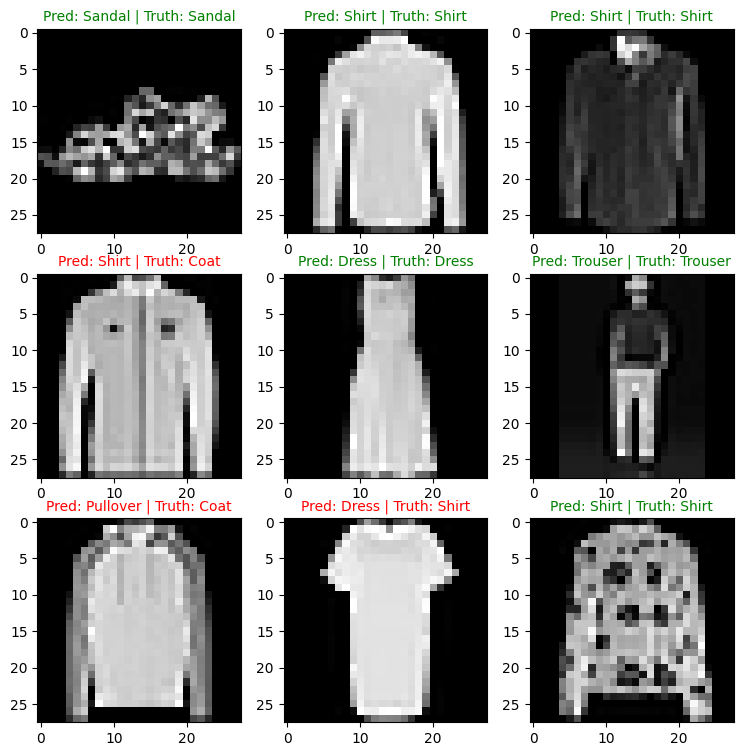

In [122]:
# Plotting predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

plt.show()

# Making a confusion matrix to evaluate the model

Helps to give a clearer picture about model's evaluation

Steps:
1. Make predictions with test data
2. Plot a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [124]:
from tqdm.auto import tqdm

# 1. Making predictions

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions..."):
    X, y = X.to(device), y.to(device)

    y_logits = model_2(X)

    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

# print(y_preds)
y_pred_tensor = torch.cat(y_preds) # Concatenates list of tensors into one tensor
y_pred_tensor[:10]
len(y_pred_tensor)


Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

10000

In [131]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.8 MB/s eta 0:00:00
mlxtend version: 0.22.0


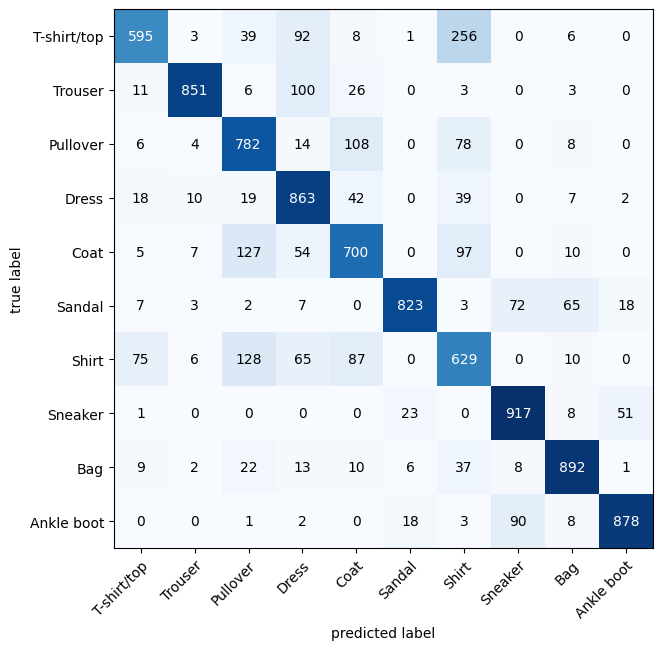

In [137]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plotting the matrix
fig, ax = plot_confusion_matrix(
  conf_mat=confmat_tensor.numpy(),
  class_names=class_names,
  figsize=(10,7)
)

In [136]:
confmat_tensor

tensor([[595,   3,  39,  92,   8,   1, 256,   0,   6,   0],
        [ 11, 851,   6, 100,  26,   0,   3,   0,   3,   0],
        [  6,   4, 782,  14, 108,   0,  78,   0,   8,   0],
        [ 18,  10,  19, 863,  42,   0,  39,   0,   7,   2],
        [  5,   7, 127,  54, 700,   0,  97,   0,  10,   0],
        [  7,   3,   2,   7,   0, 823,   3,  72,  65,  18],
        [ 75,   6, 128,  65,  87,   0, 629,   0,  10,   0],
        [  1,   0,   0,   0,   0,  23,   0, 917,   8,  51],
        [  9,   2,  22,  13,  10,   6,  37,   8, 892,   1],
        [  0,   0,   1,   2,   0,  18,   3,  90,   8, 878]])

# Loading and Saving the best model


In [138]:
# Saving
from pathlib import Path

dir = Path("models")
dir.mkdir(parents=True,
          exist_ok=True)

name = "TinyVgg.pth"
model_save_path = dir / name
torch.save(obj=model_2.state_dict(),
           f=model_save_path)

In [139]:
# Loading
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(model_save_path))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [140]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results, model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3374316394329071,
  'model_acc': 87.37020766773163},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3374316394329071,
  'model_acc': 87.37020766773163})

In [141]:
# Check if model results are close
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)